In [1]:
phase = sc.textFile("./AviationData.txt") \
            .map(lambda line: line.split(" | ")) \
            .filter(lambda line: line[0]!='Event Id') \
            .map(lambda line: (line[0], line[28].lower())) \


deaths = sc.textFile("./AviationData.txt") \
            .map(lambda line: line.split(" | ")) \
            .filter(lambda line: line[0]!='Event Id') \
            .map(lambda line: (line[0], line[23])) \


result = phase.join(deaths) \
            .map(lambda line: (line[1][0], line[1][1])) \
            .reduceByKey(lambda a, b: int(a or 0)+int(b or 0)) \

spark_data = result.collect()
spark_data

[('', 18659),
 ('approach', 5060),
 ('taxi', 129),
 ('climb', 2161),
 ('unknown', 1110),
 ('other', 122),
 ('takeoff', 6051),
 ('maneuvering', 7181),
 ('descent', 1405),
 ('standing', 248),
 ('landing', 706),
 ('cruise', 7474),
 ('go-around', 866)]

In [2]:
import pandas as pd

phase_data = [ list(d) for d in spark_data ]
phase_data = filter(lambda x: x[0]!='', phase_data)

phase_data = pd.DataFrame(phase_data, columns=['phase','died'])
phase_data

,phase,died
0,approach,5060
1,taxi,129
2,climb,2161
3,unknown,1110
4,other,122
5,takeoff,6051
6,maneuvering,7181
7,descent,1405
8,standing,248
9,landing,706


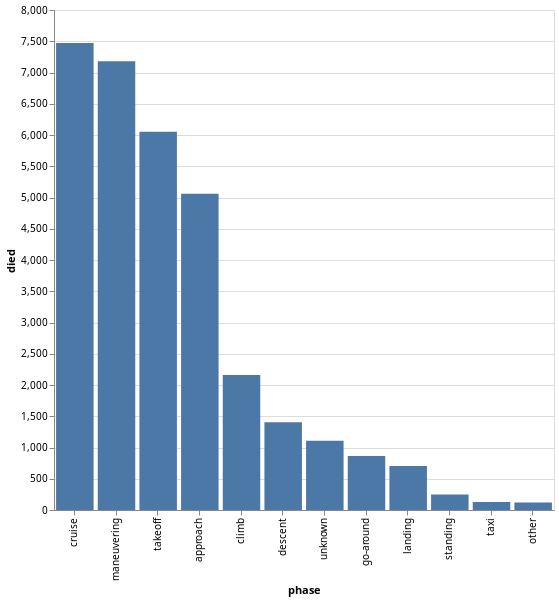

In [3]:
import altair as alt
from vega_datasets import data

alt.renderers.enable('notebook')

chart = alt.Chart(phase_data,width=500, height=500).mark_bar().encode(
    x=alt.X('phase:O', sort=alt.EncodingSortField(field="died", order='descending')),
    y='died:Q',
)

chart